In [1]:
import numpy as np
import pandas as pd

distinct_features = ["By Owner",
                     "Exclusive",
                     "Sublet / Lease-Break",
                     "No Fee",
                     "Reduced Fee",
                     "Short Term Allowed",
                     "Furnished",
                     "Laundry In Unit",
                     "Private Outdoor Space",
                     "Parking Space",
                     "Cats Allowed",
                     "Dogs Allowed",
                     "Doorman",
                     "Elevator",
                     "Fitness Center",
                     "Laundry In Building",
                     "Common Outdoor Space",
                     "Storage Facility"]

def load_data(filename):
    with open(filename) as f:
        data = pd.read_json(f)

    dist = data.features.apply(
        lambda x: pd.Series(map(lambda z: 1 if (z in x) else 0, distinct_features) +
                            [list(np.setdiff1d(x, distinct_features))]))
    dist.columns = distinct_features + ["UNIQUES"]

    data = data.join(dist)

    man_counts = pd.DataFrame(data.manager_id.value_counts())
    man_counts["manager count"] = man_counts["manager_id"]
    man_counts["manager_id"] = man_counts.index

    data = pd.merge(data, man_counts, on="manager_id")

    return data


train_data = pd.read_json("~/two-sigma/data/processed_train.json")

In [7]:
ImageStat = pd.read_csv('~/two-sigma/data/full-image-stats.csv')

In [8]:
New = ImageStat[['avg_B','avg_G','avg_R','avg_imgwidth','avg_imgheight','avg_metadata','listing_id']]

In [9]:
NewData = pd.merge(train_data, New, on='listing_id', how='left')

In [10]:
NewData = NewData.fillna(0)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Low_avg_B = NewData[NewData['interest_level']=='low'].avg_B
Med_avg_B = NewData[NewData['interest_level']=='medium'].avg_B
High_avg_B = NewData[NewData['interest_level']=='high'].avg_B

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Low_avg_G = NewData[NewData['interest_level']=='low'].avg_G
Med_avg_G = NewData[NewData['interest_level']=='medium'].avg_G
High_avg_G = NewData[NewData['interest_level']=='high'].avg_G

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

Low_avg_R = NewData[NewData['interest_level']=='low'].avg_R
Med_avg_R = NewData[NewData['interest_level']=='medium'].avg_R
High_avg_R = NewData[NewData['interest_level']=='high'].avg_R

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

Low_avg_imgheight = NewData[NewData['interest_level']=='low'].avg_imgheight
Med_avg_imgheight = NewData[NewData['interest_level']=='medium'].avg_imgheight
High_avg_imgheight = NewData[NewData['interest_level']=='high'].avg_imgheight

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

Low_avg_imgwidth = NewData[NewData['interest_level']=='low'].avg_imgwidth
Med_avg_imgwidth = NewData[NewData['interest_level']=='medium'].avg_imgwidth
High_avg_imgwidth = NewData[NewData['interest_level']=='high'].avg_imgwidth

In [75]:
Low_avg_imagesize = NewData[NewData['interest_level']=='low'].avg_imagesize
Med_avg_imagesize = NewData[NewData['interest_level']=='medium'].avg_imagesize
High_avg_imagesize = NewData[NewData['interest_level']=='high'].avg_imagesize

In [80]:
Low_img = NewData[NewData['interest_level']=='low'].img_quantity
Med_img = NewData[NewData['interest_level']=='medium'].img_quantity
High_img = NewData[NewData['interest_level']=='high'].img_quantity

In [84]:
Low_avg_brightness = NewData[NewData['interest_level']=='low'].avg_brightness
Med_avg_brightness = NewData[NewData['interest_level']=='medium'].avg_brightness
High_avg_brightness = NewData[NewData['interest_level']=='high'].avg_brightness

In [88]:
Low_avg_luminance = NewData[NewData['interest_level']=='low'].avg_luminance
Med_avg_luminance = NewData[NewData['interest_level']=='medium'].avg_luminance
High_avg_luminance = NewData[NewData['interest_level']=='high'].avg_luminance

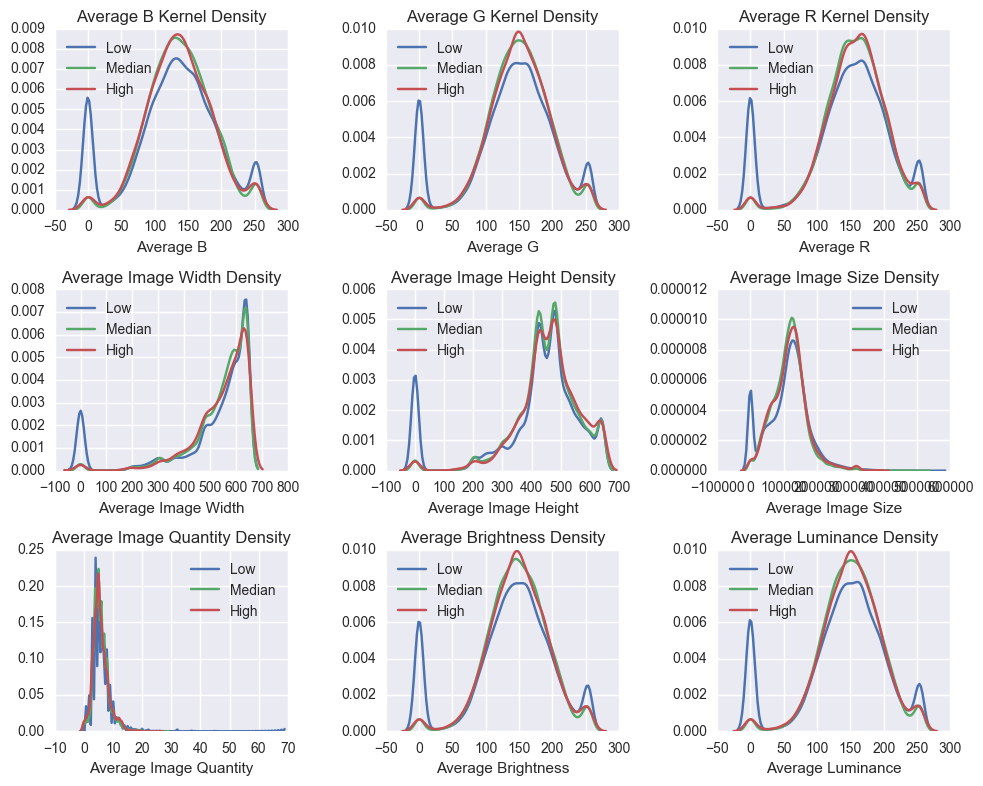

In [89]:
#fig = plt.figure()

plt.figure(figsize=(10,8))

plt.subplot(3,3,1)
sns.kdeplot(Low_avg_B,label="Low")
sns.kdeplot(Med_avg_B,label="Median")
sns.kdeplot(High_avg_B,label="High")

plt.title('Average B Kernel Density')
plt.xlabel('Average B')



plt.subplot(3,3,2)
sns.kdeplot(Low_avg_G,label="Low")
sns.kdeplot(Med_avg_G,label="Median")
sns.kdeplot(High_avg_G,label="High")

plt.title('Average G Kernel Density')
plt.xlabel('Average G')



plt.subplot(3,3,3)
sns.kdeplot(Low_avg_R,label="Low")
sns.kdeplot(Med_avg_R,label="Median")
sns.kdeplot(High_avg_R,label="High")

plt.title('Average R Kernel Density')
plt.xlabel('Average R')



plt.subplot(3,3,4)
sns.kdeplot(Low_avg_imgwidth,label="Low")
sns.kdeplot(Med_avg_imgwidth,label="Median")
sns.kdeplot(High_avg_imgwidth,label="High")

plt.title('Average Image Width Density')
plt.xlabel('Average Image Width')

plt.subplot(3,3,5)
sns.kdeplot(Low_avg_imgheight,label="Low")
sns.kdeplot(Med_avg_imgheight,label="Median")
sns.kdeplot(High_avg_imgheight,label="High")

plt.title('Average Image Height Density')
plt.xlabel('Average Image Height')

plt.subplot(3,3,6)
sns.kdeplot(Low_avg_imagesize,label="Low")
sns.kdeplot(Med_avg_imagesize,label="Median")
sns.kdeplot(High_avg_imagesize,label="High")

plt.title('Average Image Size Density')
plt.xlabel('Average Image Size')

plt.subplot(3,3,7)
sns.kdeplot(Low_img,label="Low")
sns.kdeplot(Med_img,label="Median")
sns.kdeplot(High_img,label="High")

plt.title('Average Image Quantity Density')
plt.xlabel('Average Image Quantity')

plt.subplot(3,3,8)
sns.kdeplot(Low_avg_brightness,label="Low")
sns.kdeplot(Med_avg_brightness,label="Median")
sns.kdeplot(High_avg_brightness,label="High")

plt.title('Average Brightness Density')
plt.xlabel('Average Brightness')

plt.subplot(3,3,9)
sns.kdeplot(Low_avg_luminance,label="Low")
sns.kdeplot(Med_avg_luminance,label="Median")
sns.kdeplot(High_avg_luminance,label="High")

plt.title('Average Luminance Density')
plt.xlabel('Average Luminance')

plt.tight_layout()
plt.show()

In [91]:
train_data['LogScaledPrice']= np.log(train_data['price'])
Low_price = train_data[train_data['interest_level']=='low'].LogScaledPrice
Med_price = train_data[train_data['interest_level']=='medium'].LogScaledPrice
High_price = train_data[train_data['interest_level']=='high'].LogScaledPrice


In [102]:
Low_word_count = train_data[train_data['interest_level']=='low'].word_count
Med_word_count = train_data[train_data['interest_level']=='medium'].word_count
High_word_count = train_data[train_data['interest_level']=='high'].word_count

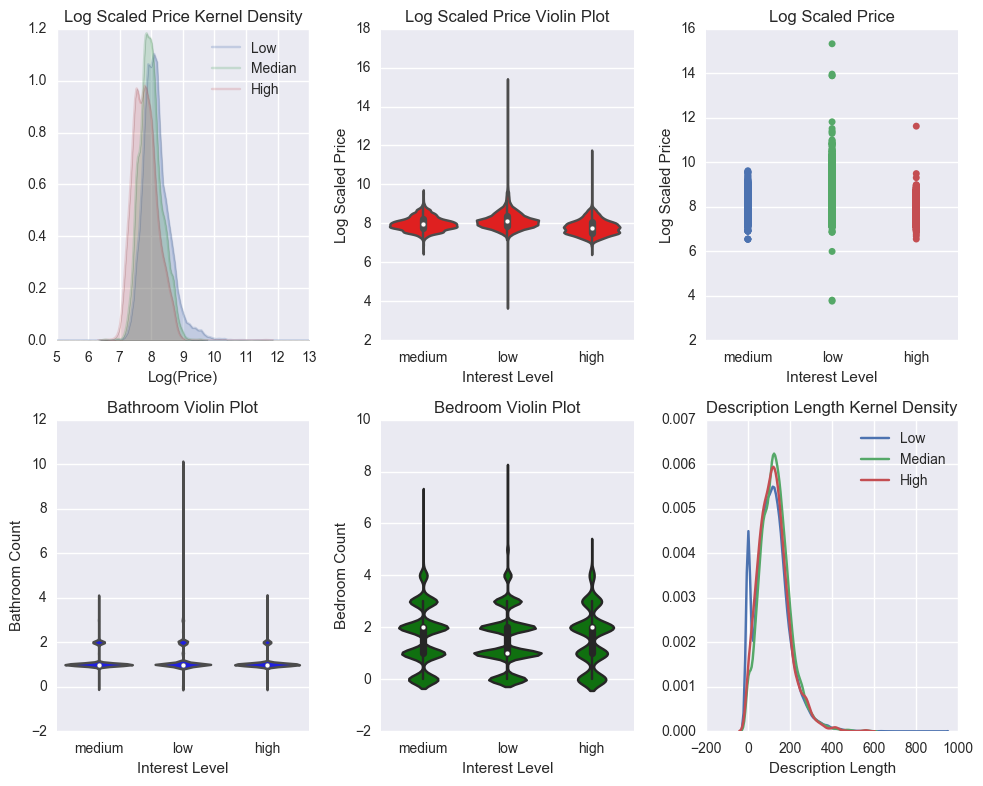

In [103]:
plt.figure(figsize=(10,8))

plt.subplot(2,3,1)
sns.kdeplot(Low_price,label="Low",shade = True, alpha = .25 )
sns.kdeplot(Med_price,label="Median",shade = True, alpha = .25)
sns.kdeplot(High_price,label="High",shade = True,alpha = .2)


plt.title('Log Scaled Price Kernel Density')
plt.xlabel('Log(Price)')
plt.xlim(5,13)

plt.subplot(2,3,2)
sns.violinplot(train_data["interest_level"], train_data["LogScaledPrice"], color="r")
sns.despine(left=True)
plt.xlabel('Interest Level')
plt.ylabel('Log Scaled Price')
plt.title('Log Scaled Price Violin Plot')

plt.subplot(2,3,3)
sns.stripplot(x=train_data["interest_level"], y=train_data["LogScaledPrice"], data=train_data)
plt.xlabel('Interest Level')
plt.ylabel('Log Scaled Price')
plt.title('Log Scaled Price')

plt.subplot(2,3,4)
sns.violinplot(train_data["interest_level"], train_data["bathrooms"], color="b")
sns.despine(left=True)
plt.xlabel('Interest Level')
plt.ylabel('Bathroom Count')
plt.title('Bathroom Violin Plot')

plt.subplot(2,3,5)
sns.violinplot(train_data["interest_level"], train_data["bedrooms"], color="g")
sns.despine(left=True)
plt.xlabel('Interest Level')
plt.ylabel('Bedroom Count')
plt.title('Bedroom Violin Plot')

plt.subplot(2,3,6)
sns.kdeplot(Low_word_count,label="Low")
sns.kdeplot(Med_word_count,label="Median")
sns.kdeplot(High_word_count,label="High")

plt.title('Description Length Kernel Density')
plt.xlabel('Description Length')

plt.tight_layout()
plt.show()


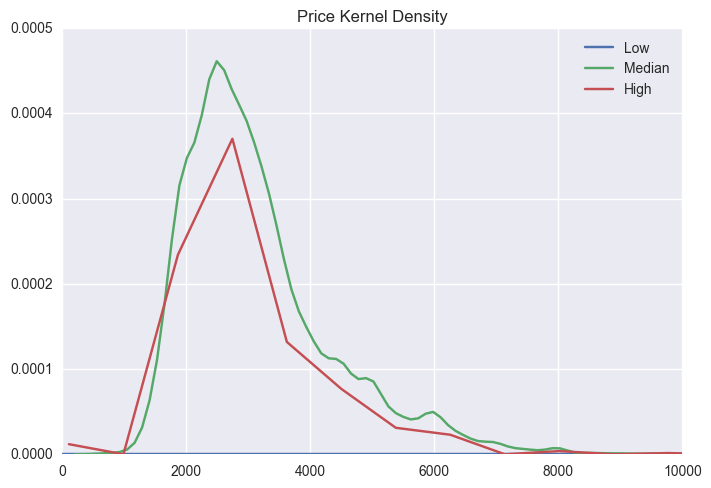

In [113]:
train_data['LogScaledPrice']= np.log(train_data['price'])
Low_price1 = train_data[train_data['interest_level']=='low'].price
Med_price1 = train_data[train_data['interest_level']=='medium'].price
High_price1 = train_data[train_data['interest_level']=='high'].price

sns.kdeplot(Low_price1,label="Low"  )
sns.kdeplot(Med_price1,label="Median")
sns.kdeplot(High_price1,label="High")
plt.title('Price Kernel Density')
plt.xlim(0,10000)
plt.show()



In [ ]:
New_data